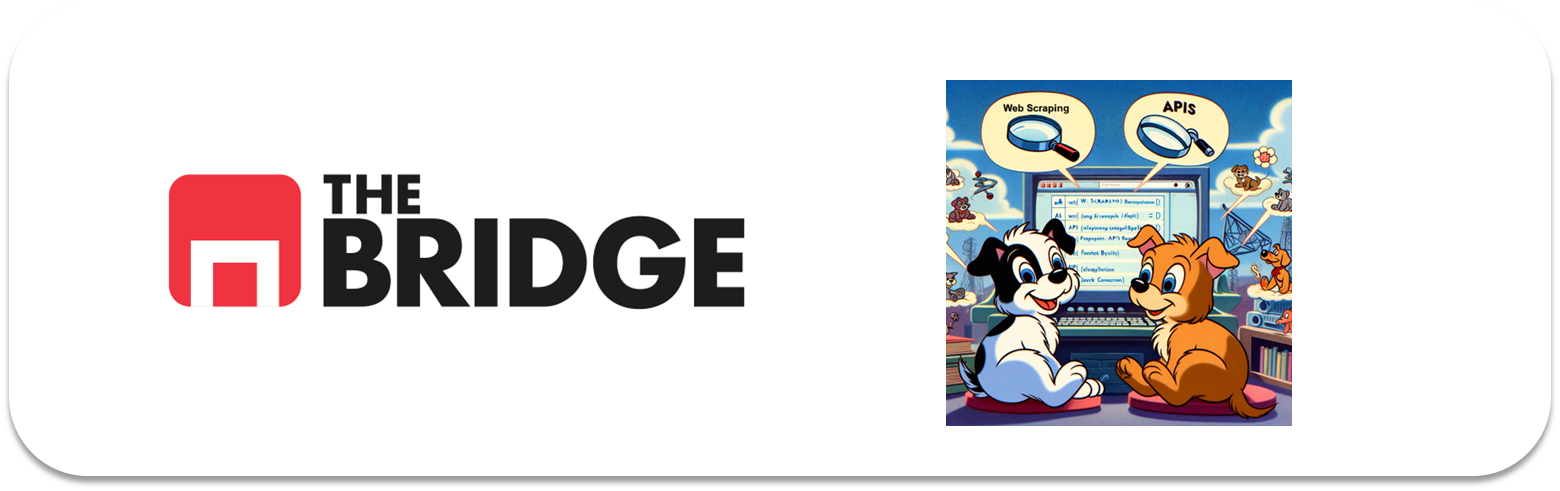

## PRACTICA OBLIGATORIA: SQL

* La práctica obligatoria de esta unidad consiste en extraer datos de películas de dos fuentes diferentes y cruzarlos, para una fuente tiraremos de Scraping y para la otra de API, y luego practicarás con pandas un poco. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## Objetivo

El objetivo final es tener un `DataFrame` con una serie de películas de 2023, sus datos más destacados (titulo, año de lanzamiento, director, guionistas, actores, género(s), coste de producción *budget* y recaudación a nivel USA y a nivel mundial). Para ello tendrás que acceder a dos fuentes de información y unir los datos, además cada fuente con un método diferente. Al final tendrás que contestar a unas preguntas sencillas. 


## #0

Como siempre, haz aquí todos los imports que necesites:

In [3]:
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

## #1 API: The Movie Database (TMDb)

Cambiamos el orden temático de la unidad y empezamos por obtener los datos de las películas antes de obtener sus datos de ingresos porque tiene más sentido, ya que mandan las películas.

Vamos a acceder a TMDb cuyos datos básicos te dejo aquí (pero recuerda que es la última vez, a partir de ahora tendrás que buscar la info de las APIs por tu cuenta)


### API de The Movie Database (TMDb)

- **URL Base**: `https://api.themoviedb.org/3`


#### Endpoints Principales:

1. **Obtener Detalles de una Película**:
   - **Endpoint**: `/movie/{movie_id}`
   - **Método**: GET
   - **Uso**: Obtiene detalles específicos de una película utilizando su ID.
   - **Ejemplo**: `https://api.themoviedb.org/3/movie/550?api_key=tu_api_key`


2. **Buscar Películas**:
   - **Endpoint**: `/search/movie`
   - **Método**: GET
   - **Uso**: Busca películas por título.
   - **Ejemplo**: `https://api.themoviedb.org/3/search/movie?query=Inception&api_key=tu_api_key`

3. **Buscar películas por diferentes criterios**:
   - **Endpoint**: `/discover/movie`
   - **Método**: GET
   - **Uso**: Obtiene información de las películas por criterios, tiene más de 30 filtros y funciones de ordenación.
   - **Ejemplo**: `https://api.themoviedb.org/3/person/500?api_key=tu_api_key`

4. **Obtener Películas Populares**:
   - **Endpoint**: `/movie/popular`
   - **Método**: GET
   - **Uso**: Devuelve una lista de películas populares.
   - **Ejemplo**: `https://api.themoviedb.org/3/movie/popular?api_key=tu_api_key`

Recuerda reemplazar `tu_api_key` con tu propia API key.

### 1.1

Investiga en la página de [documentación](https://developer.themoviedb.org/reference/discover-movie) detallada del endpoint de "Discover" e identifica los parámetros que tenemos que pasar a la API para obtener las 20 películas americanas y las 20 españolas de 2023 más populares. 

Nota: Las respuestas de esta API están paginadas, y cada página contiene 20 respuestas, si quisieramos más tendríamos que incluir el parámetro `page` con su número en peticiones diferentes, por eso para esta práctica lo vamos a limitar a 20 respuestas, para que no haya que jugar con el paginado).

In [4]:
tu_api_key = "d86c1e15da026ca446a352a308687fcc"

### 1.2

Para poder hacer la llamada a la API con endpoint "Discover" necesitamos pasarle una serie de parámetros como los anteriores y la API_Key. Hay dos formas de hacerlo, mediante la querystring en la url o mediante el argumento params de request. Como tenemos que hacer una consulta para las películas estadounidenses y otra para las españolas, vamos a utilizar los dos métodos.

En este ejercicio se pide usar el método de incluir todos los parámetros en la url mediante la sintaxis ?\<parametro>=\<valor>&... para obtener las 20 películas norteamericanas más populares de 2023, según TMDb. Para ello crea una variable `url_usa` a partir de la siguiente guía:  

url_usa = base_url + end_point + "?\<parametro1>=\<valor1>&\<parametros2>=\<valor2>..."  

Donde tendrá que incluir los parámetros "api_key" con valor tu api_key para TMDb y el resto de parámetros que necesites con sus valores para obtener los datos pedidos (utiliza `year` para el año). Luego utiliza el metodo request adecuado y vuelca la salida en `respuesta_usa`

Ojo el valor del nombre de Estados Unidos en este caso no es USA, pero casi.

EXTRA: Hay una forma de que te devuelva los datos en español cuando corresponda, a ver si lo logras.
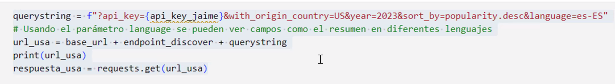

In [5]:
base_url = "https://api.themoviedb.org/3"
endpoint_discover = "/discover/movie"
endpoint_movie = "/movie/{movie_id}"

In [13]:
querystring = f"?api_key={tu_api_key}&with_origin_country=US&year=2023&sort_by=popularity.desc&language_es-ES"

headers = {
    "accept": "application/json",
    "Authorization": tu_api_key
}
url = base_url + endpoint_discover + querystring

response = requests.get(url)


### 1.3 

Escribe el código de respuesta y su explicación. Vuelca los datos de la respuesta en una variable `datos_usa` (es decir el resultado del metodo `json`). Muestra los campos del json de respuesta y decide cuál es el que vamos a usar para extrarer los datos. Muestra los valores para ese campo y luego asignalo a la variable `pelis_usa`.

In [12]:
print(response.status_code, response.reason)

200 OK


In [ ]:
datos_usa = response.json()
print(list(datos_usa.keys()))

['page', 'results', 'total_pages', 'total_results']


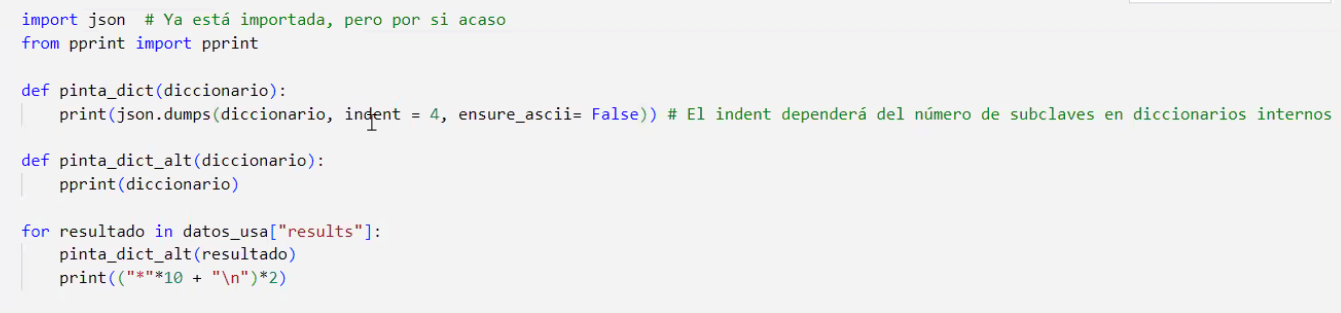

### 1.3 Alt

Si no tienes una API-Key o no has conseguido obtener los valores, lee el archivo "./data/usa_movies.json" de la forma conveniente y vuelca sus datos en una variable llamada `pelis_usa`

In [14]:
pelis_usa = datos_usa["results"]
pelis_usa

[{'adult': False,
  'backdrop_path': '/9PqD3wSIjntyJDBzMNuxuKHwpUD.jpg',
  'genre_ids': [16, 35, 10751],
  'id': 1075794,
  'original_language': 'en',
  'original_title': 'Leo',
  'overview': 'Jaded 74-year-old lizard Leo has been stuck in the same Florida classroom for decades with his terrarium-mate turtle. When he learns he only has one year left to live, he plans to escape to experience life on the outside but instead gets caught up in the problems of his anxious students — including an impossibly mean substitute teacher.',
  'popularity': 1661.593,
  'poster_path': '/pD6sL4vntUOXHmuvJPPZAgvyfd9.jpg',
  'release_date': '2023-11-17',
  'title': 'Leo',
  'video': False,
  'vote_average': 7.7,
  'vote_count': 317},
 {'adult': False,
  'backdrop_path': '/xgGGinKRL8xeRkaAR9RMbtyk60y.jpg',
  'genre_ids': [16, 10751, 10402, 14, 35],
  'id': 901362,
  'original_language': 'en',
  'original_title': 'Trolls Band Together',
  'overview': 'When Branch’s brother, Floyd, is kidnapped for his mus

### 1.4 

Convierte los resultados a un `DataFrame` aprovechando que es una lista de diccionarios con la misma estructura. Asigna lo a "df_movies". Muestra sus primeras filas y la info general.

In [16]:
df_movies = pd.DataFrame(pelis_usa)
df_movies

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/9PqD3wSIjntyJDBzMNuxuKHwpUD.jpg,"[16, 35, 10751]",1075794,en,Leo,Jaded 74-year-old lizard Leo has been stuck in...,1661.593,/pD6sL4vntUOXHmuvJPPZAgvyfd9.jpg,2023-11-17,Leo,False,7.7,317
1,False,/xgGGinKRL8xeRkaAR9RMbtyk60y.jpg,"[16, 10751, 10402, 14, 35]",901362,en,Trolls Band Together,"When Branch’s brother, Floyd, is kidnapped for...",1064.930,/bkpPTZUdq31UGDovmszsg2CchiI.jpg,2023-10-12,Trolls Band Together,False,7.2,234
2,False,/fm6KqXpk3M2HVveHwCrBSSBaO0V.jpg,"[18, 36]",872585,en,Oppenheimer,The story of J. Robert Oppenheimer's role in t...,1020.836,/8Gxv8gSFCU0XGDykEGv7zR1n2ua.jpg,2023-07-19,Oppenheimer,False,8.2,5080
3,False,/t5zCBSB5xMDKcDqe91qahCOUYVV.jpg,"[27, 9648]",507089,en,Five Nights at Freddy's,"Recently fired and desperate for work, a troub...",759.232,/j9mH1pr3IahtraTWxVEMANmPSGR.jpg,2023-10-25,Five Nights at Freddy's,False,7.8,2608
4,False,/kjQBrc00fB2RjHZB3PGR4w9ibpz.jpg,"[878, 28, 53]",670292,en,The Creator,Amid a future war between the human race and t...,702.008,/vBZ0qvaRxqEhZwl6LWmruJqWE8Z.jpg,2023-09-27,The Creator,False,7.1,1239
5,False,/rMvPXy8PUjj1o8o1pzgQbdNCsvj.jpg,"[28, 12, 53]",299054,en,Expend4bles,Armed with every weapon they can get their han...,606.907,/iwsMu0ehRPbtaSxqiaUDQB9qMWT.jpg,2023-09-15,Expend4bles,False,6.4,826
6,False,/4XM8DUTQb3lhLemJC51Jx4a2EuA.jpg,"[28, 80, 53]",385687,en,Fast X,Over many missions and against impossible odds...,555.213,/fiVW06jE7z9YnO4trhaMEdclSiC.jpg,2023-05-17,Fast X,False,7.2,4368
7,False,/628Dep6AxEtDxjZoGP78TsOxYbK.jpg,"[28, 53]",575264,en,Mission: Impossible - Dead Reckoning Part One,Ethan Hunt and his IMF team embark on their mo...,488.515,/NNxYkU70HPurnNCSiCjYAmacwm.jpg,2023-07-08,Mission: Impossible - Dead Reckoning Part One,False,7.6,2588
8,False,/f1AQhx6ZfGhPZFTVKgxG91PhEYc.jpg,"[18, 36, 10752]",753342,en,Napoleon,An epic that details the checkered rise and fa...,470.163,/jE5o7y9K6pZtWNNMEw3IdpHuncR.jpg,2023-11-22,Napoleon,False,6.5,445
9,False,/biRLtgt3t8MwxeLRRJkf1BsHoeq.jpg,"[28, 53]",1060090,en,The Collective,A group of righteous assassins called The Coll...,424.887,/Ah9H6Sj434nJiZpTPQrovHaEePV.jpg,2023-08-04,The Collective,False,5.3,28


### 1.5



De las columnas que tenemos realmente nos interesan unas pocas. Yo me voy a quedar con las siguientes:

```python
col_seleccionadas = ["id","genre_ids","original_title","title","overview","vote_average"]
```

Añade alguna más si quieres, pero manten las anteriores siempre. Construye un nuevo `DataFrame`, "df_pop_usa", que contenga sólo las columnas seleccionadas

In [17]:
col_seleccionadas = ["id","genre_ids","original_title","title","overview","vote_average"]

df_pop_usa = df_movies[col_seleccionadas]
df_pop_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20 non-null     int64  
 1   genre_ids       20 non-null     object 
 2   original_title  20 non-null     object 
 3   title           20 non-null     object 
 4   overview        20 non-null     object 
 5   vote_average    20 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ KB


### 1.6 

Guardamos ese dataframe para luego, ahora vamos a buscar las películas españolas. Para ello vamos a probar el otro método, ahora crea un diccionario siguiendo esta estructura:

```python
querystring = {
    "api_key": "PON AQUI TU API-KEY",
    "parametro1": "valor1",
    ...
}
```  
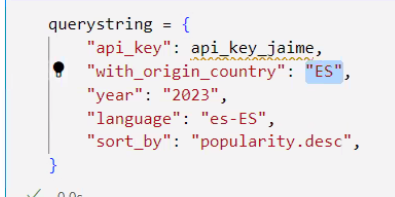

In [ ]:
querystring = {
    "api_key" = tu_api_key,
    "with_origin_country" = "ES",
    "yeae"

}

### 1.7

Ahora construye la url_spain, pero ten en cuenta que ya sólo necesitas la url base y el endpoint


In [9]:
querystring = f"?api_key={tu_api_key}&with_origin_country=ES&year=2023&sort_by=popularity.desc&language_es-ES"

headers = {
    "accept": "application/json",
    "Authorization": tu_api_key
}
url = base_url + endpoint_discover + querystring

response = requests.get(url)
response.status_code

200

### 1.8

Lanza la petición usando el método adecuado y con argumentos `url_spain` para la url y el diccionario creado en \#1.6 para el argumento "params" (que es como se envían parametros fuera de la url, hay otra forma a través del parámetro data, pero lo iremos viendo a lo largo del curso). Asigna la respuesta a `respuesta_spain`, y muestra su "status_code" y su "reason".

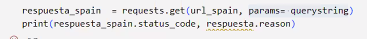

### 1.9 
Repite todo el proceso que hicimos para las películas norteamericanas hasta obtener un dataframe similar (con las mismas columnas), llámalo `df_pop_spain`. Si no tienes el API-Key o no has sabido obtener los datos de la API, utiliza los datos que hay en "./data/spain_movies.json"  
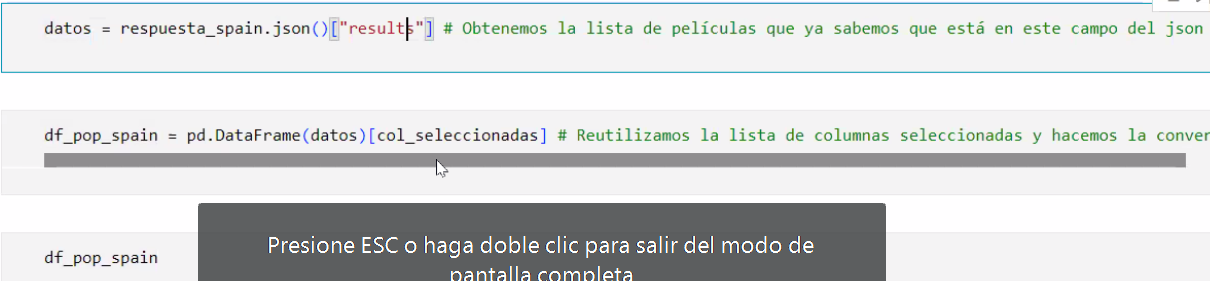

### 1.10 
Para concluir esta parte, junta los dos dataframes en uno solo, df_base_movies, usando el método [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) de pandas. Luego convierte la columna id en su índice.  
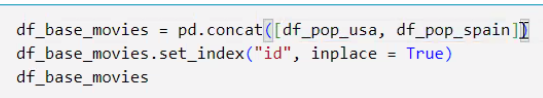

## #2 Scrapping: BoxOfficeMojo

### 2.1 [EXTRA] 
Si el primer ejercicio es extra, porque el tiempo de ejecución depende muy mucho de lo bien que se te de inspeccionar la página y entender los tags y los atributos. Pero te animo a que lo intentes, lo haremos en clase en cualquier caso.

Este ejercicio consiste en scrapear la página de ingresos mundiales de las películas con mayores ingresos que ofrece el site BoxOfficeMojo en la siguiente url:

In [18]:
url_mojo = "https://www.boxofficemojo.com/year/world/?ref_=bo_nb_wey_tab"

Tendrás que acceder inspeccionar y buscar los tags necesarios para obtener una dataframe que refleje los mismos datos que muestra la tabla.  
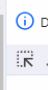

Para hacerte más sencillo el trabajo, te doy aquí algunas pistas:

* Los nombres de los campos se pueden obtener de los tag "th" que hay dentro del tag "table" con atributo `class='a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated'`

* Los valores se encuentran en los tags "tr" del tag "tbody". Tendrás que ver cómo sacarlos de ahí.

1. Inspecciona la página y ve desplegando hasta encontrar tbody y ahí ya investiga hasta dar con los tags últimos que tienen los datos.
2. Repasa las soluciones a los ejercicios del workout de WebScraping para conseguir llegar al `DataFrame`

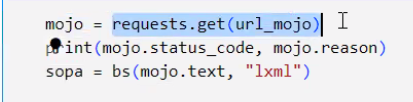

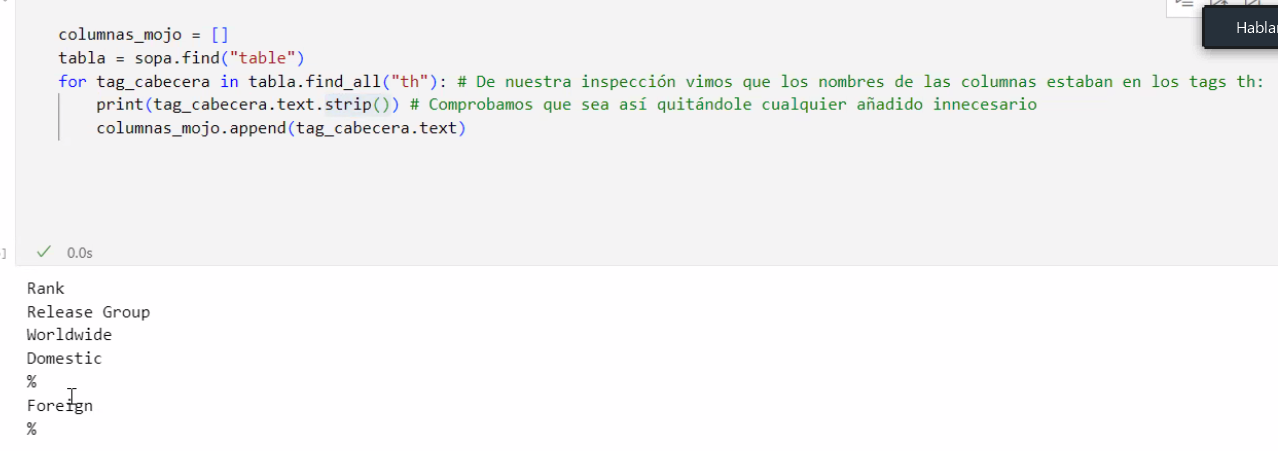

### 2.2

Si no has podido hacer el ejercicio Extra anterior, lee los datos que hay en "./data/mojo_data.xlsx", cargándolos en un dataframe al que puedes poner por nombre "df_mojo". Usar "Rank" como índice y muestra el contenido y su información general.

### 2.3

Algunos campos tendrán un nombre raro, cambia esos % por el "<nombre de la columna anterior>_%_var"

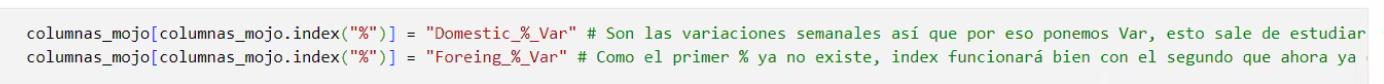

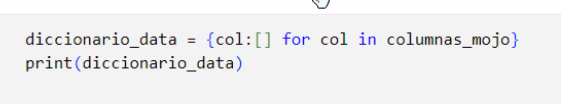

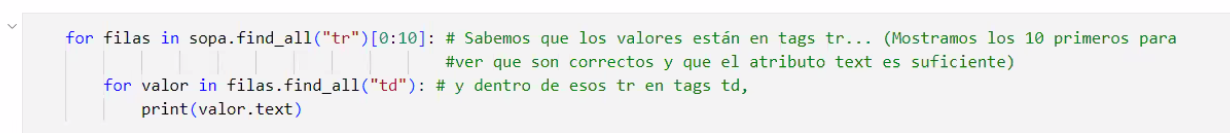

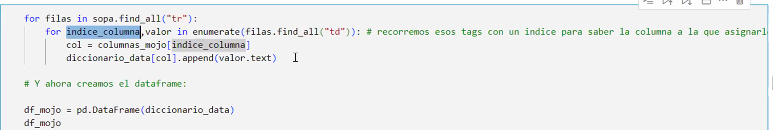

### 2.4

Hora de volver a nuestro `DataFrame` de peliculas obtenido de la API. Pégale las recuadaciones de df_mojo, de forma que mantegamos las 40 peliculas populares, no importa cuantas de df_mojo queden. ¿Qué método vas a usar?¿Qué tipo de join quieres hacer?¿Qué campos son los índices?

### 2.5 
Muestra los 10 primeros registros del resultado del cruce y su información general

### 2.6

Muestra las películas españolas para las que sí hay información de ingresos. Cuidado: Tiene "truco"


In [ ]:
las 20 primeras son españolas y las demas son americanas

### 2.7
Para terminar, vuelve a cruzar las tablas pero ahora con un inner join de forma que sólo nos quedemos con las peliculas que tienen recaudación en box office. Antes marca de alguna manera el indice de popularidad en df_base_movies y después de hacer el join comprueba "visualmente" cuanto de correlados están los rakings de popularidad e ingresos.

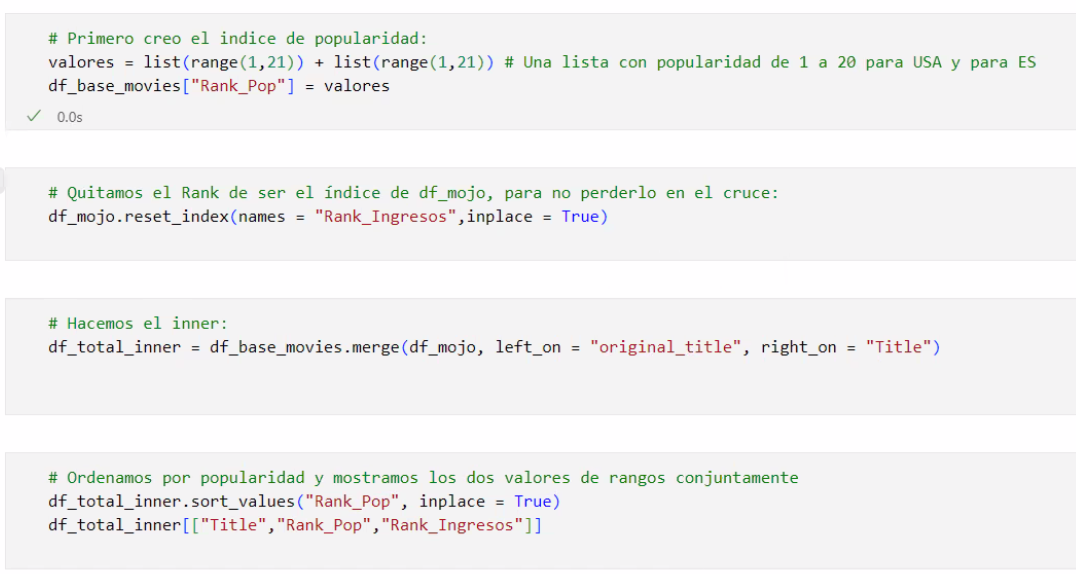

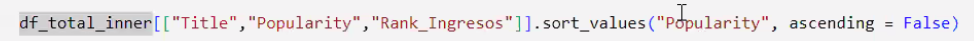